In [11]:
import pandas as pd
from pipeline import Dataset, backtest
from matplotlib import pyplot as plt
from datatools import data_quantization, check_dataframe, extract_market_data
from pipeline.backtest import cross_validation, evaluation_for_submission
from visualization.metric import plot_performance, Performance
from qids_lib import QIDS

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
dataset = Dataset.load('../../data/parsed')
# dataset = load_mini_dataset('../../data/parsed_mini/')

In [4]:
quantized_fundamental, _ = data_quantization(dataset.fundamental)
df = pd.concat([quantized_fundamental, dataset.fundamental, dataset.ref_return], axis=1).dropna()
quantile_feature = ['turnoverRatio_QUANTILE', 'transactionAmount_QUANTILE', 'pb_QUANTILE', 'ps_QUANTILE',
                            'pe_ttm_QUANTILE', 'pe_QUANTILE', 'pcf_QUANTILE']
original_feature = ['turnoverRatio', 'transactionAmount', 'pb', 'ps', 'pe_ttm', 'pe', 'pcf']

check_dataframe(df, expect_index=['day','asset'])

DataFame is all good for the tests


In [8]:
from sklearn.linear_model import LinearRegression
def linear_model(X,y):
        reg = LinearRegression().fit(X, y)
        return reg

In [9]:
performance_cv = cross_validation(
    training=linear_model,
    feature_columns=quantile_feature,
    df=df, n_splits=997, lookback_window=200)

  0%|          | 0/997 [00:00<?, ?it/s]

Skipping this fold since we cannot truncate the last day.


The ending score for metric train_r2 is: 3.0131e-03
The ending score for metric val_cum_pearson is: 7.5489e-03


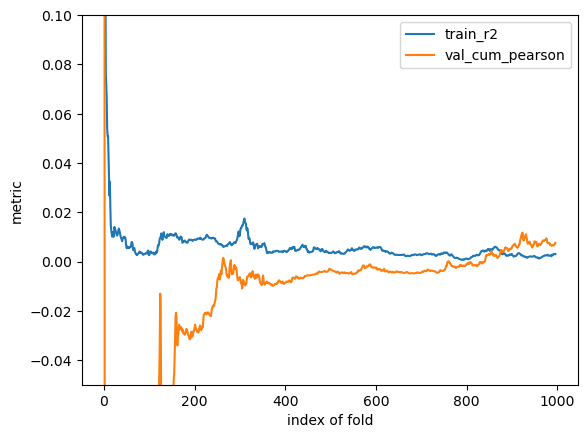

In [12]:
plt.figure()
plot_performance(performance_cv, metrics_selected=['train_r2', 'val_cum_pearson'])
plt.show()

In [14]:
df = pd.concat([dataset.fundamental, extract_market_data(dataset.market)], axis=1).dropna()
f_quantile_feature = ['turnoverRatio_QUANTILE', 'transactionAmount_QUANTILE', 'pb_QUANTILE', 'ps_QUANTILE',
                              'pe_ttm_QUANTILE', 'pe_QUANTILE', 'pcf_QUANTILE']
m_quantile_feature = ['avg_price_QUANTILE', 'volatility_QUANTILE', 'mean_volume_QUANTILE']
feature = ['turnoverRatio', 'transactionAmount', 'pb', 'ps', 'pe_ttm', 'pe', 'pcf', 'avg_price', 'volatility',
                   'mean_volume']

qids = QIDS(path_prefix='../../')
performance_ev = evaluation_for_submission(
    model=linear_model,
    feature_columns=feature, dataset=dataset,
    df=df, qids=qids, lookback_window=200)

  0%|          | 0/700 [00:00<?, ?it/s]

Data Feeding is finished.


The ending score for metric train_r2 is: 3.1536e-03
The ending score for metric test_cum_r2 is: -1.0276e-02
The ending score for metric test_cum_pearson is: -2.7707e-02


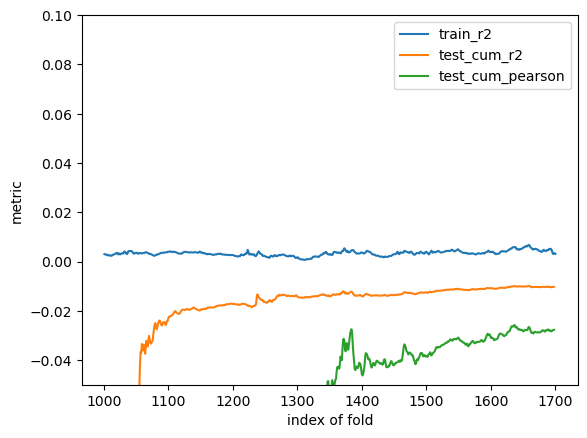

In [15]:
plt.figure()
plot_performance(performance_ev, metrics_selected=['train_r2', 'test_cum_r2', 'test_cum_pearson'])
plt.show()

